Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

Целевая переменная:
Price

Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import norm
from scipy import stats

Функции

Загрузка данных

In [611]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [612]:
train.shape

(10000, 20)

In [613]:
test.shape

(5000, 19)

In [614]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [615]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [616]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [617]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

Приведение типов данных

In [618]:
train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [619]:
test.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [620]:
train['Rooms'] = train['Rooms'].astype('int64')
test['Rooms'] = test['Rooms'].astype('int64')

In [621]:
train['HouseFloor'] = train['HouseFloor'].astype('int64')
test['HouseFloor'] = test['HouseFloor'].astype('int64')

Обзор данных

In [622]:
df_num_features = train.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
2,4765,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


In [623]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Ошибка данных количество комнат равно нулю

In [624]:
train.loc[train['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0,138.427694,136.215499,0.0,4,3,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0,212.932361,211.231125,0.0,2,3,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0,41.790881,NaN,0.0,13,0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0,49.483501,NaN,0.0,16,0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0,81.491446,NaN,0.0,4,0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0,2.377248,0.873147,0.0,1,0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0,38.697117,19.345131,9.0,9,16,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0,87.762616,85.125471,0.0,5,15,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [625]:
#Находим среднюю площадь комнаты
s_m = (train['Square']/train['Rooms']).median()
s_m

30.83161933424854

In [626]:
#высчитываем количество комнат исходя из средней площади комнаты
train.loc[train['Rooms'] == 0, 'Rooms'] = round(train['Square']/s_m) 

In [627]:
#случай где при округлении получается 0
train.loc[train['Rooms'] == 0, 'Rooms'] = 1 

In [628]:
#проверяем
train.loc[train['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Год постройки больше текущего года

In [629]:
train.loc[train['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [630]:
#явная опечатка, исправляем
train.loc[train['HouseYear'] == 20052011, 'HouseYear'] = int((2005 + 2011) / 2)
train.loc[train['HouseYear'] == 4968, 'HouseYear'] = 1968

In [631]:
#смотрим категорийные данные
train_obj_features = train.select_dtypes(include='object')
train_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


Преобразуем категорийные в бинарные

In [632]:
train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [633]:
train['Ecology_2'] = pd.get_dummies(train['Ecology_2'])

In [634]:
train['Ecology_3'] = pd.get_dummies(train['Ecology_3'])

In [635]:
train['Ecology_3'].value_counts()

0    9725
1     275
Name: Ecology_3, dtype: int64

In [636]:
train['Shops_2'] = pd.get_dummies(train['Shops_2'])

In [637]:
train['Shops_2'].value_counts()

0    9175
1     825
Name: Shops_2, dtype: int64

Обработка пропусков

In [638]:
train.isna().sum(axis = 0)

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [639]:
test.isna().sum(axis = 0)

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [640]:
#смотрим где общая площадь меньше площади средней комнаты
train.loc[train['Square'] < 30]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
178,2416,57,1.0,29.298168,29.770784,5.0,7,5,1964,0.133215,0,0,49,11395,3,1406.0,3,4,1,148991.265200
212,1748,88,2.0,5.497061,67.628717,1.0,24,22,1977,0.127376,0,0,43,8429,3,NaN,3,9,0,412511.088764
219,5354,85,1.0,28.535084,12.733642,6.0,4,9,1967,0.037178,0,0,52,11217,1,2300.0,1,7,0,142269.268090
257,1334,23,1.0,29.401008,NaN,1.0,4,17,2019,0.034656,0,0,0,168,0,NaN,0,0,0,71690.969474
381,5612,23,1.0,29.567101,NaN,1.0,6,4,1977,0.034656,0,0,0,168,0,NaN,0,0,0,74012.218991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,7657,38,1.0,4.502784,4.618547,1.0,28,1,1977,0.060753,0,0,15,2787,2,520.0,0,7,0,483283.488083
9642,16202,105,1.0,22.072457,16.540036,2.0,4,9,1963,0.069660,0,0,31,6119,4,NaN,1,2,0,126778.794309
9811,10801,27,1.0,29.386944,16.820321,5.0,3,4,1968,0.211401,0,0,9,1892,0,NaN,0,1,0,121716.142598
9835,11223,99,1.0,26.096679,17.755301,5.0,9,9,1975,0.012339,0,0,35,5776,1,2078.0,2,4,0,139010.680500


In [641]:
#убираем случаи где общая площадь меньше жилой
train.loc[train['Square'] < train['LifeSquare'], 'Square'] = train['LifeSquare'] + 15

In [642]:
#еще раз смотрим где общая площадь меньше площади средней комнаты, стало меньше
train.loc[train['Square'] < 30]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
219,5354,85,1.0,28.535084,12.733642,6.0,4,9,1967,0.037178,0,0,52,11217,1,2300.0,1,7,0,142269.268090
257,1334,23,1.0,29.401008,NaN,1.0,4,17,2019,0.034656,0,0,0,168,0,NaN,0,0,0,71690.969474
381,5612,23,1.0,29.567101,NaN,1.0,6,4,1977,0.034656,0,0,0,168,0,NaN,0,0,0,74012.218991
431,6629,3,1.0,25.761151,15.614058,5.0,4,9,1976,0.050900,0,0,43,10621,1,30.0,2,3,0,102046.205346
501,15923,27,1.0,26.553188,NaN,0.0,25,0,1977,0.072158,0,0,2,629,1,NaN,0,0,1,114256.236153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,7657,38,1.0,19.618547,4.618547,1.0,28,1,1977,0.060753,0,0,15,2787,2,520.0,0,7,0,483283.488083
9642,16202,105,1.0,22.072457,16.540036,2.0,4,9,1963,0.069660,0,0,31,6119,4,NaN,1,2,0,126778.794309
9811,10801,27,1.0,29.386944,16.820321,5.0,3,4,1968,0.211401,0,0,9,1892,0,NaN,0,1,0,121716.142598
9835,11223,99,1.0,26.096679,17.755301,5.0,9,9,1975,0.012339,0,0,35,5776,1,2078.0,2,4,0,139010.680500


In [643]:
#Находим среднюю стоимость метра
p_m = (train['Price']/train['Square']).mean()
print(p_m)

3865.364962518999


In [644]:
train.loc[train['Square'] < 30, 'Square'] = train['Price'] / p_m

In [645]:
#еще раз смотрим где общая площадь меньше площади средней комнаты, стало ещё меньше
train.loc[train['Square'] < 30]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
257,1334,23,1.0,18.547012,NaN,1.0,4,17,2019,0.034656,0,0,0,168,0,NaN,0,0,0,71690.969474
381,5612,23,1.0,19.147537,NaN,1.0,6,4,1977,0.034656,0,0,0,168,0,NaN,0,0,0,74012.218991
431,6629,3,1.0,26.400148,15.614058,5.0,4,9,1976,0.050900,0,0,43,10621,1,30.0,2,3,0,102046.205346
501,15923,27,1.0,29.558978,NaN,0.0,25,0,1977,0.072158,0,0,2,629,1,NaN,0,0,1,114256.236153
769,5234,30,1.0,25.640678,NaN,1.0,11,22,2018,0.000078,0,0,22,6398,141,1046.0,3,23,0,99110.577389
870,1300,23,1.0,18.927743,28.444315,10.0,8,17,2016,0.034656,0,0,0,168,0,NaN,0,0,0,73162.636079
1184,3902,23,1.0,16.957538,NaN,1.0,4,4,1977,0.034656,0,0,0,168,0,NaN,0,0,0,65547.071846
1316,11526,27,1.0,27.838062,1.969969,1.0,18,1,1977,0.011654,0,0,4,915,0,NaN,0,0,0,107604.269441
1326,5890,23,1.0,16.251808,27.598712,8.0,13,15,2015,0.034656,0,0,0,168,0,NaN,0,0,0,62819.167655
1476,1775,101,1.0,28.000628,18.442768,3.0,3,5,1968,0.225825,1,0,41,6558,7,1548.0,3,2,0,108232.647619


In [646]:
#Допускаем что жилая площадь должна быть ненамного меньше общей
train.loc[train['LifeSquare'].isnull(), 'LifeSquare'] = train['Square']-train['KitchenSquare']

In [647]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.892700,58.037593,41.795645,6.273300,8.526700,12.609400,1984.86600,0.118858,0.009700,0.027500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.082500,214138.857399
std,4859.01902,43.587592,0.839915,77.554334,77.825496,28.560917,5.241148,6.775974,18.41187,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,1.000000,15.652489,0.370619,0.000000,1.000000,0.000000,1910.00000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,42.167359,25.402990,1.000000,4.000000,9.000000,1974.00000,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000,153872.633942
50%,8394.50000,36.000000,2.000000,53.707399,37.063266,6.000000,7.000000,13.000000,1977.00000,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192269.644879
75%,12592.50000,75.000000,2.000000,66.636930,49.823229,9.000000,12.000000,17.000000,2001.00000,0.195781,0.000000,0.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,0.000000,249135.462171
max,16798.00000,209.000000,19.000000,7495.592129,7480.592129,2014.000000,42.000000,117.000000,2020.00000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [648]:
#смотрим где жилая площадь уж совсем маленькая
train.loc[train['LifeSquare'] < 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3.0,106.958871,0.641822,0.0,17,0,2018,0.072158,0,0,2,629,1,NaN,0,0,1,337299.867936
95,4280,34,2.0,61.334968,4.091945,1.0,26,1,2014,0.069753,0,0,53,13670,4,NaN,1,11,0,286564.441972
134,12613,6,2.0,65.496674,5.589324,1.0,5,17,1977,0.243205,0,0,5,1564,0,540.0,0,0,0,180727.643541
158,16779,27,3.0,51.991064,4.896202,1.0,22,25,1977,0.072158,0,0,2,629,1,NaN,0,0,1,174687.566186
160,3522,6,1.0,66.419841,3.987101,1.0,2,1,1977,0.243205,0,0,5,1564,0,540.0,0,0,0,193361.229815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,13583,27,2.0,58.943039,3.319486,1.0,11,17,2017,0.011654,0,0,4,915,0,NaN,0,0,0,142789.948977
9813,2040,62,1.0,122.438148,5.751401,1.0,2,3,1977,0.072158,0,0,2,629,1,NaN,0,0,1,224900.897679
9828,13630,24,3.0,127.141143,4.811405,1.0,3,1,2017,0.111627,0,0,50,12238,8,1970.0,2,3,0,611250.912034
9888,6053,6,1.0,41.314775,5.005477,1.0,9,17,2016,0.243205,0,0,5,1564,0,540.0,0,0,0,159149.515475


In [649]:
#Убираем случаи со слишком маленькой жилой площадью, тоже вычитаем кухни
train.loc[train['LifeSquare'] < 10, 'LifeSquare'] = train['Square'] - train['KitchenSquare']

In [650]:
#остаётся три случая с гигантскими кухнями, но может бывает такое ...
train.loc[train['LifeSquare'] < 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4588,448,48,1.0,41.186904,0.186904,41.0,2,1,1977,0.041125,0,0,46,9515,5,NaN,1,10,0,216882.265408
5888,16593,52,2.0,64.859242,2.859242,62.0,15,17,1977,0.371149,0,0,34,7065,1,750.0,2,5,0,185993.474671
6036,12666,34,2.0,60.603363,2.603363,58.0,14,22,1977,0.069753,0,0,53,13670,4,NaN,1,11,0,261733.472106


Расмотрим наблюдение 'Healthcare_1'


Text(0.5, 1.0, 'Распределение Healthcare_1')

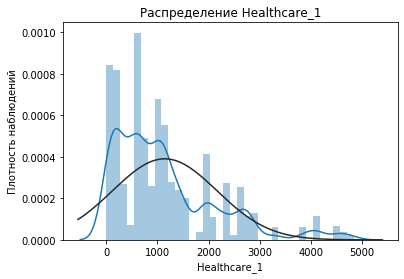

In [651]:
sns.distplot(train['Healthcare_1'], fit=norm)
plt.ylabel('Плотность наблюдений')
plt.title('Распределение Healthcare_1')

Явно наблюдения Healthcare_1 деляться на три группы, логично пропущеные значения заменить на три равные группы 
средних значений из этих групп

In [ ]:
H_1 = train['Healthcare_1'].loc[train['Healthcare_1'] < 500].mean()
H_2 = train['Healthcare_1'].loc[train['Healthcare_1'] < 900].mean()
H_3 = train['Healthcare_1'].loc[train['Healthcare_1'] < 5000].mean()
train_H0 = train.loc[train['Healthcare_1'].isnull()]
train_H0_1 = train_H0.loc[train_H0.index < 1600]
train.loc[train_H0_1.index, 'Healthcare_1'] = H_1
train_H0 = train.loc[train['Healthcare_1'].isnull()]
train_H0_1 = train_H0.loc[train_H0.index < 3300]
train.loc[train_H0_1.index, 'Healthcare_1'] = H_2
train.loc[train['Healthcare_1'].isnull(), 'Healthcare_1'] = H_3


In [575]:
#Находим среднее значения для каждой группы
H_1 = train['Healthcare_1'].loc[train['Healthcare_1'] < 500].mean()
H_1

159.85672082717872

In [652]:
train_H2 = train.loc[train['Healthcare_1'] > 500]
H_2 = train['Healthcare_1'].loc[train['Healthcare_1'] < 900].mean()
H_2

382.19607072691554

In [653]:
train_H3 = train.loc[train['Healthcare_1'] > 900]
H_3 = train['Healthcare_1'].loc[train['Healthcare_1'] < 5000].mean()
H_3

1142.9044598231449

Теперь поровну заполняем средними значениями трёх групп

In [654]:
train_H0 = train.loc[train['Healthcare_1'].isnull()]

In [655]:
train_H0_1 = train_H0.loc[train_H0.index < 3333]

In [656]:
train.loc[train_H0_1.index, 'Healthcare_1'] = H_1

In [657]:
train_H0 = train.loc[train['Healthcare_1'].isnull()]

In [658]:
train_H0_1 = train_H0.loc[train_H0.index < 6666]
train.loc[train_H0_1.index, 'Healthcare_1'] = H_2

In [659]:
train.loc[train['Healthcare_1'].isnull(), 'Healthcare_1'] = H_3

In [660]:
train.loc[train['Healthcare_1'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Обработка данных

Text(0.5, 1.0, 'Распределение цен')

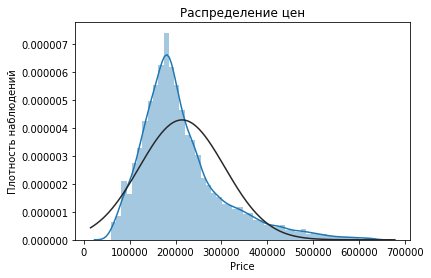

In [661]:
#график распределения цен
sns.distplot(train['Price'], fit=norm)
plt.ylabel('Плотность наблюдений')
plt.title('Распределение цен')

Text(0.5, 1.0, 'Распределение цены в зависимости от года постройки')

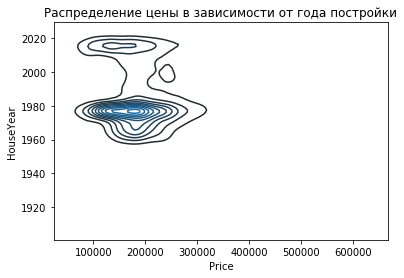

In [662]:
#График зависимости цены от года постройки
sns.kdeplot(train['Price'], train['HouseYear']);
plt.title('Распределение цены в зависимости от года постройки')

Text(0.5, 1.0, 'Распределение цены в зависимости от фактора экологии 2')

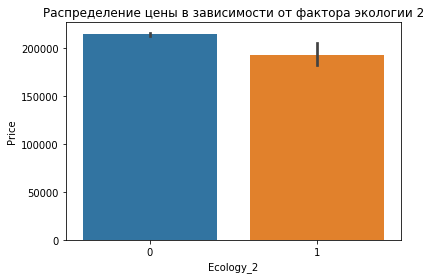

In [663]:
#График на основе категорийных переменных
sns.barplot(x='Ecology_2', y='Price', data=train);
plt.title('Распределение цены в зависимости от фактора экологии 2')

Text(0.5, 1.0, 'Распределение цены в зависимости от фактора Магазин 2')

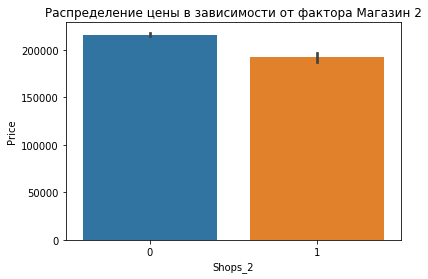

In [664]:
#График на основе категорийных переменных
sns.barplot(x='Shops_2', y='Price', data=train);
plt.title('Распределение цены в зависимости от фактора Магазин 2')

Text(0.5, 1.0, 'Распределение цены в зависимости от фактора экологии 3')

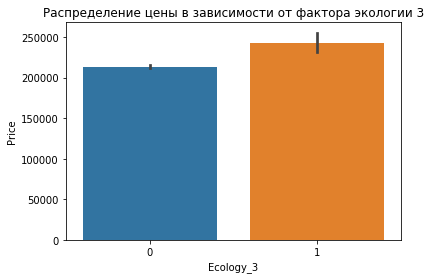

In [665]:
#График на основе категорийных переменных
sns.barplot(x='Ecology_3', y='Price', data=train);
plt.title('Распределение цены в зависимости от фактора экологии 3')

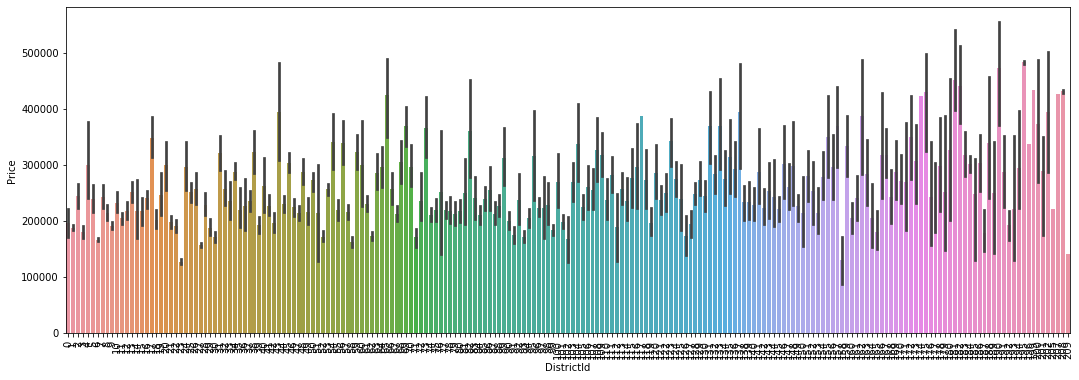

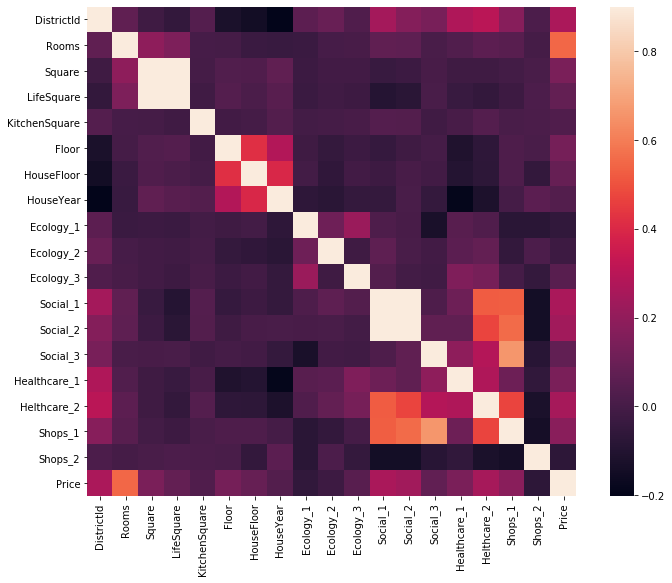

In [666]:
plt.figure(figsize=(18, 6))
sns.barplot(train['DistrictId'], train['Price'])
plt.xticks(rotation=90)
corrmat = train.loc[:, train.columns != 'Id'].corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.9, square=True)

Text(0.5, 1, 'Корреляция переменных')

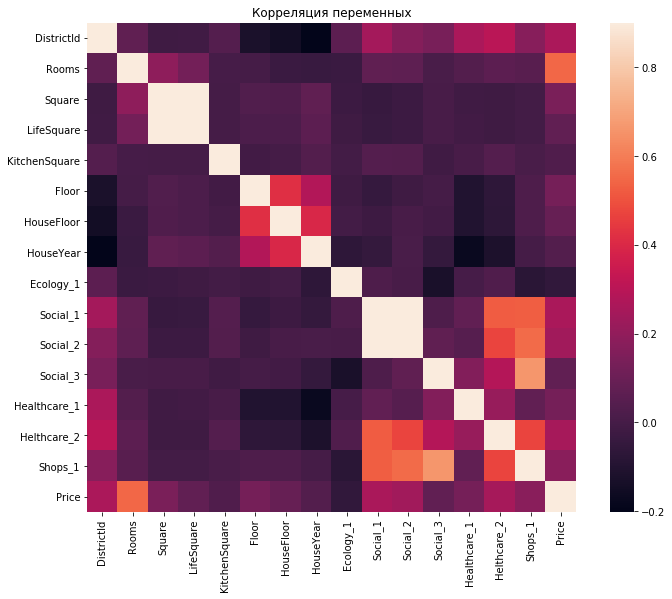

In [202]:
#график корреляции
corrmat = train.loc[:, train.columns != 'Id'].corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.title('Корреляция переменных')

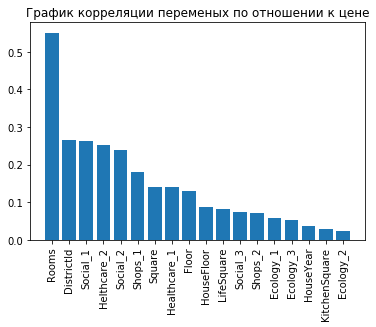

In [667]:
#График корреляции переменых по отношении к цене
corrmat = train.loc[:, train.columns != 'Id'].corrwith(
    train['Price']).abs().sort_values(ascending=False)[1:]
plt.bar(corrmat.index, corrmat.values)
plt.title('График корреляции переменых по отношении к цене')
plt.xticks(rotation='vertical')
plt.show()

Кластеры

In [668]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [669]:
model = KMeans(n_clusters=3, random_state=100)

In [670]:
scaler = MinMaxScaler()
train_cluster = train.copy()

In [671]:
train_cluster_scaled = pd.DataFrame(scaler.fit_transform(
    train_cluster.loc[:, ['Rooms', 'Price']]), columns=['Rooms', 'Price'])

In [672]:
centers = scaler.inverse_transform(model.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')


AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

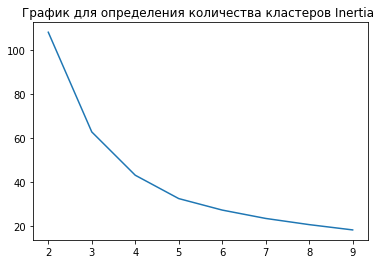

In [673]:
inertias = []

for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_cluster_scaled)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, 10), inertias)

plt.title('График для определения количества кластеров Inertia ')

plt.show()

На основе графика выбираем количество кластеров = 5

In [674]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
train_labels = model.fit_predict(train_cluster_scaled)
plt.scatter(train_cluster_scaled['Rooms'], train_cluster_scaled['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Агломеративная кластеризация ')
plt.show()

NameError: name 'centers' is not defined

Text(0.5, 1.0, 'График алгоритма кластеризации - k-means')

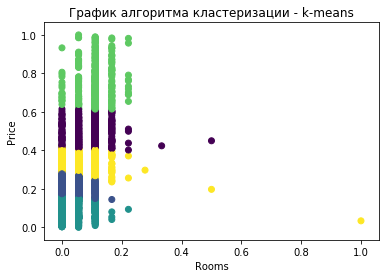

In [675]:
kmeans_model = KMeans(n_clusters=5, random_state=100)
train_labels = kmeans_model.fit_predict(train_cluster_scaled)
plt.scatter(train_cluster_scaled['Rooms'],
            train_cluster_scaled['Price'], c=train_labels)

plt.xlabel('Rooms')
plt.ylabel('Price')

plt.title('График алгоритма кластеризации - k-means')

 Построение моделей

In [749]:
print(train.columns)

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')


In [750]:
features = list(train.loc[:, train.columns != 'Id'].corrwith(
    train['Price']).abs().sort_values(ascending=False)[1:].index)

target = 'Price'

In [751]:
train[features].head()

,Rooms,DistrictId,Social_1,Helthcare_2,Social_2,Shops_1,Square,Healthcare_1,Floor,HouseFloor,LifeSquare,Social_3,Shops_2,Ecology_1,Ecology_3,HouseYear,KitchenSquare,Ecology_2
0,2.0,35,33,0,7976,11,47.981561,159.856721,7,9,29.442751,5,0,0.089040,0,1969,6.0,0
1,3.0,41,46,1,10309,16,65.683640,240.000000,7,9,40.049543,1,0,0.000070,0,1978,8.0,0
2,2.0,53,34,1,7759,3,44.947953,229.000000,8,12,29.197612,0,0,0.049637,0,1968,0.0,0
3,2.0,58,23,0,5735,5,53.352981,1084.000000,8,17,52.731512,3,0,0.437885,0,1977,9.0,0
4,1.0,99,35,2,5776,4,39.649192,2078.000000,11,12,23.776169,1,0,0.012339,0,1976,7.0,0


In [752]:
X_train, X_test, y_train, y_test = train_test_split(
    train[features], train[target], test_size=0.3, random_state=42)

In [753]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [754]:
y_pred = rfr_model.predict(X_test)


In [755]:
  R2 = r2_score ( y_test , y_pred )
print(R2)

0.7151442083159207


обрабатываем данные в датасете test

In [759]:
test['Ecology_2'] = pd.get_dummies(test['Ecology_2'])
test['Ecology_3'] = pd.get_dummies(test['Ecology_3'])
test['Shops_2'] = pd.get_dummies(test['Shops_2'])

Text(0.5, 1.0, 'Распределение Healthcare_1')

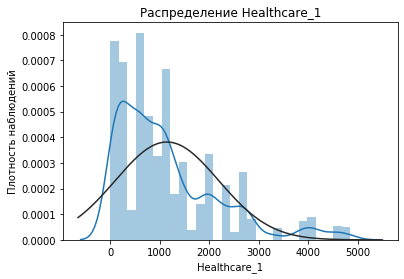

In [770]:
sns.distplot(test['Healthcare_1'], fit=norm)
plt.ylabel('Плотность наблюдений')
plt.title('Распределение Healthcare_1')

In [776]:
test['Healthcare_1']
test.loc[test['Healthcare_1'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


Не уверен, что мой метод правильный, но лучше не придумалось

In [775]:
H_1 = test['Healthcare_1'].loc[test['Healthcare_1'] < 300].mean()
H_2 = test['Healthcare_1'].loc[test['Healthcare_1'] < 1700].mean()
H_3 = test['Healthcare_1'].loc[test['Healthcare_1'] < 5000].mean()
t_H0 = test.loc[test['Healthcare_1'].isnull()]
t_H0_1 = t_H0.loc[t_H0.index < 766]
test.loc[t_H0_1.index, 'Healthcare_1'] = H_1
t_H0 = test.loc[test['Healthcare_1'].isnull()]
t_H0_1 = t_H0.loc[t_H0.index < 1500]
test.loc[t_H0_1.index, 'Healthcare_1'] = H_2
test.loc[test['Healthcare_1'].isnull(), 'Healthcare_1'] = H_3



Удаляем столбец LifeSquare потму что я так понял он не важен

In [779]:
test_X = test.drop("LifeSquare", axis=1)
test_X.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2,49.882643,6.0,6,14,1972,0.310199,0,0,11,2748,1,134.822259,0,0,0
1,15856,74,2,69.263183,1.0,6,1,1977,0.075779,0,0,6,1437,3,134.822259,0,2,0
2,5480,190,1,13.597819,12.0,2,5,1909,0.000000,0,0,30,7538,87,4702.000000,5,5,0
3,15664,47,2,73.046609,9.0,22,22,2007,0.101872,0,0,23,4583,3,134.822259,3,3,0
4,14275,27,1,47.527111,1.0,17,17,2017,0.072158,0,0,2,629,1,134.822259,0,0,1


In [780]:
y_pred_test = rfr_model.predict(test_X)

In [781]:
test['Price'] = y_pred_test

In [782]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,0.009600,0.029800,24.933800,5406.900000,8.262600,1039.599434,1.31940,4.242800,0.082400,220597.602082
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,806.979546,1.47994,4.777365,0.275001,25220.471429
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,103959.407215
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,0.000000,0.000000,6.000000,1564.000000,0.000000,540.000000,0.00000,1.000000,0.000000,206152.162980
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,0.000000,0.000000,25.000000,5285.000000,2.000000,1146.657263,1.00000,3.000000,0.000000,218693.080465
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,0.000000,0.000000,36.000000,7287.000000,5.000000,1146.657263,2.00000,6.000000,0.000000,238228.671136
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,302928.971731


In [800]:
test[['Id','Price']].to_csv("test_predict.csv", index=False)